In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [3]:
pd.set_option('display.max_columns',26)
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [7]:
data.drop('ID',axis=1,inplace=True)
data.drop('CustomerID',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('SSN',axis=1,inplace=True)
data.drop('TypeofLoan',axis=1,inplace=True)

In [8]:
data['score']=np.where(data['CreditScore']!='Poor',0,1)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [9]:
data.score.value_counts()

0    62145
1    25350
Name: score, dtype: int64

In [10]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [11]:
for i in data[['MonthlyInhandSalary','Occupation','NumofDelayedPayment','ChangedCreditLimit','NumCreditInquiries','Amountinvestedmonthly','MonthlyBalance']]:
    if type(data[i])==int:
        data[i]=data[i].fillna(value=data[i].mean())
    else:
        data[i]=data[i].fillna(value=data[i].mode()[0])


In [12]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
score                     0
dtype: int64

/var/folders/24/xbz6dnq175scj5x7mtzkq64h0000gn/T/ipykernel_17971/460133985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

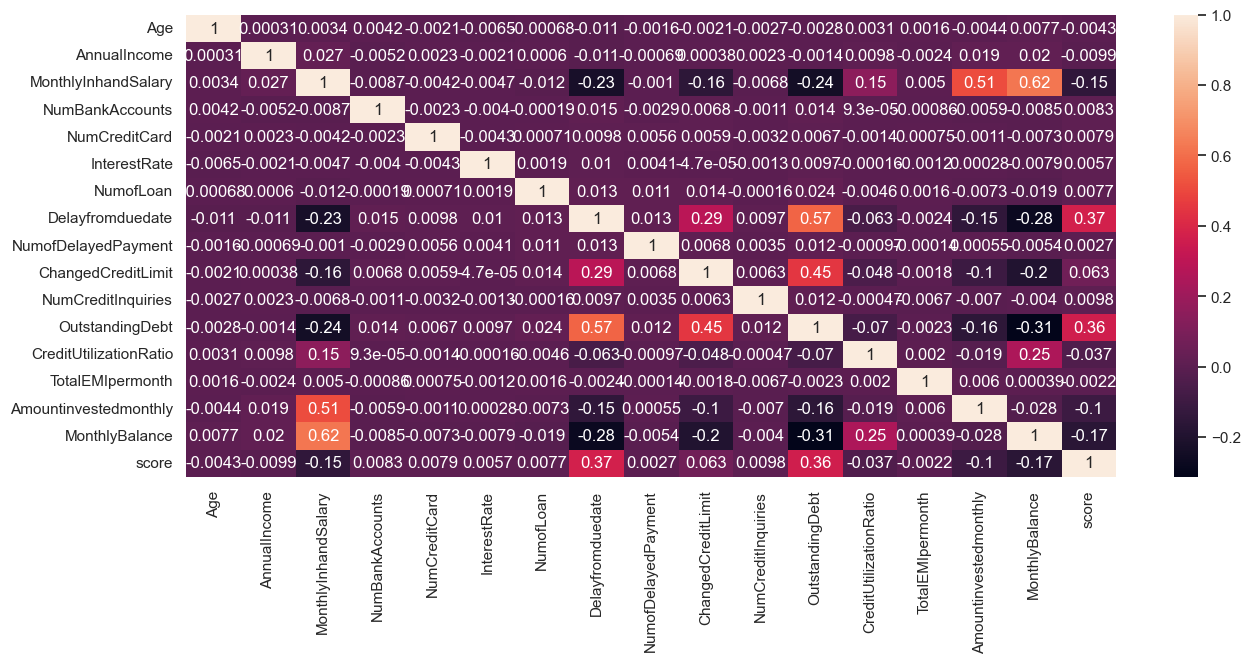

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

In [14]:
corr=data.corr()
corr

/var/folders/24/xbz6dnq175scj5x7mtzkq64h0000gn/T/ipykernel_17971/2248884307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,score
Age,1.000000,0.000313,0.003399,0.004221,-0.002128,-0.006498,-0.000678,-0.010681,-0.001581,-0.002123,-0.002683,-0.002770,0.003097,0.001550,-0.004437,0.007723,-0.004274
AnnualIncome,0.000313,1.000000,0.026656,-0.005177,0.002273,-0.002117,0.000598,-0.010983,-0.000694,0.000377,0.002289,-0.001386,0.009766,-0.002405,0.018687,0.020217,-0.009860
MonthlyInhandSalary,0.003399,0.026656,1.000000,-0.008688,-0.004209,-0.004652,-0.011670,-0.225266,-0.001032,-0.155418,-0.006759,-0.242046,0.152701,0.004996,0.512395,0.620648,-0.146113
NumBankAccounts,0.004221,-0.005177,-0.008688,1.000000,-0.002291,-0.003972,-0.000191,0.015375,-0.002937,0.006844,-0.001097,0.014379,0.000093,-0.000863,-0.005872,-0.008489,0.008252
NumCreditCard,-0.002128,0.002273,-0.004209,-0.002291,1.000000,-0.004265,0.000705,0.009764,0.005581,0.005875,-0.003225,0.006703,-0.001410,0.000752,-0.001055,-0.007272,0.007890
InterestRate,-0.006498,-0.002117,-0.004652,-0.003972,-0.004265,1.000000,0.001854,0.009996,0.004150,-0.000047,-0.001311,0.009704,-0.000157,-0.001180,0.000278,-0.007889,0.005670
NumofLoan,-0.000678,0.000598,-0.011670,-0.000191,0.000705,0.001854,1.000000,0.013155,0.010671,0.014113,-0.000157,0.024058,-0.004647,0.001606,-0.007256,-0.019410,0.007689
Delayfromduedate,-0.010681,-0.010983,-0.225266,0.015375,0.009764,0.009996,0.013155,1.000000,0.012766,0.289406,0.009700,0.572413,-0.063065,-0.002351,-0.147723,-0.276346,0.372259
NumofDelayedPayment,-0.001581,-0.000694,-0.001032,-0.002937,0.005581,0.004150,0.010671,0.012766,1.000000,0.006802,0.003527,0.011829,-0.000970,-0.000142,0.000548,-0.005392,0.002728
ChangedCreditLimit,-0.002123,0.000377,-0.155418,0.006844,0.005875,-0.000047,0.014113,0.289406,0.006802,1.000000,0.006265,0.451445,-0.048226,-0.001760,-0.102449,-0.198529,0.063139


In [15]:
data.drop('Age',axis=1,inplace=True)
data.drop('AnnualIncome',axis=1,inplace=True)
data.drop('NumBankAccounts',axis=1,inplace=True)
data.drop('NumCreditCard',axis=1,inplace=True)
data.drop('InterestRate',axis=1,inplace=True)
data.drop('NumofLoan',axis=1,inplace=True)
data.drop('NumofDelayedPayment',axis=1,inplace=True)
data.drop('NumCreditInquiries',axis=1,inplace=True)
data.drop('CreditUtilizationRatio',axis=1,inplace=True)
data.drop('TotalEMIpermonth',axis=1,inplace=True)

In [16]:
data.dtypes

Month                     object
Occupation                object
MonthlyInhandSalary      float64
Delayfromduedate           int64
ChangedCreditLimit       float64
OutstandingDebt          float64
PaymentofMinAmount        object
Amountinvestedmonthly    float64
PaymentBehaviour          object
MonthlyBalance           float64
CreditScore               object
score                      int64
dtype: object

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data[['ChangedCreditLimit','Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,3.738997,ChangedCreditLimit
1,4.043761,Delayfromduedate
2,4.340587,OutstandingDebt
3,1.581195,Amountinvestedmonthly
4,2.307658,MonthlyBalance


In [18]:
data.drop('MonthlyInhandSalary',axis=1,inplace=True)

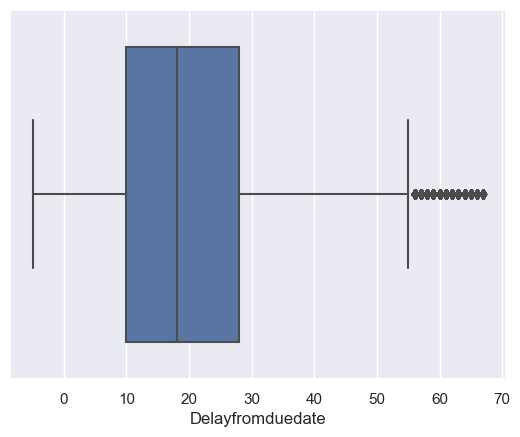

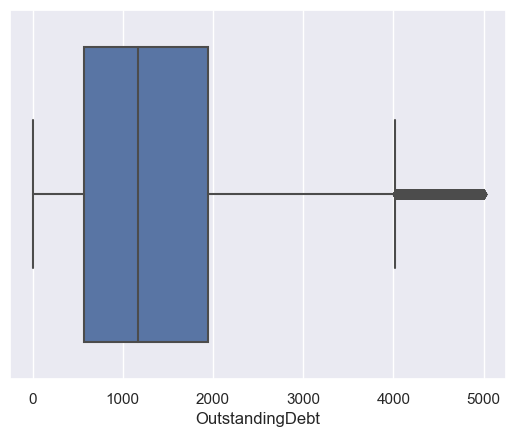

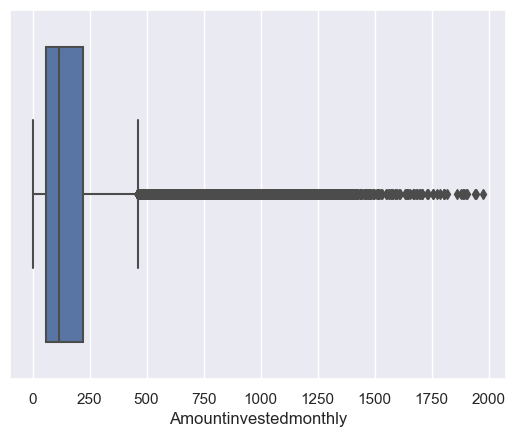

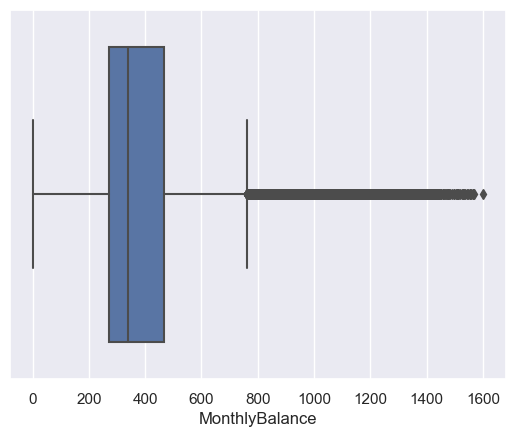

In [19]:
for i in data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [20]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
upper=q3+IQR*1.5

/var/folders/24/xbz6dnq175scj5x7mtzkq64h0000gn/T/ipykernel_17971/2305170796.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
/var/folders/24/xbz6dnq175scj5x7mtzkq64h0000gn/T/ipykernel_17971/2305170796.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [21]:
for i in data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    data[i]=np.where(data[i]>upper[i],upper[i],data[i])

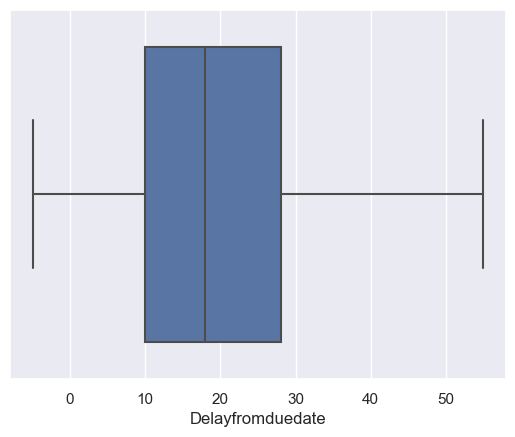

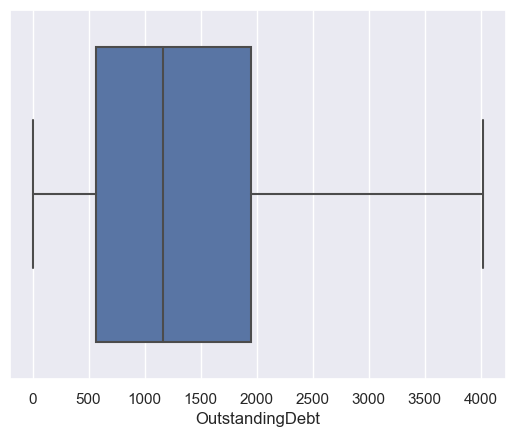

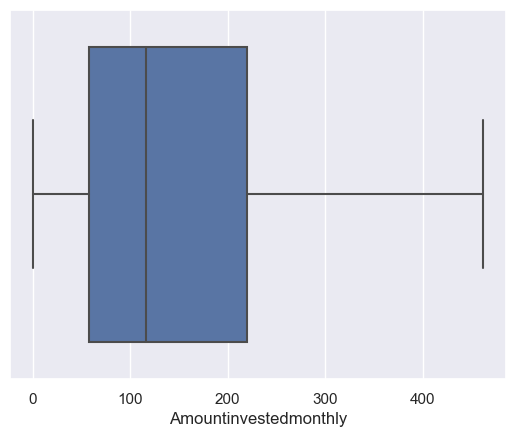

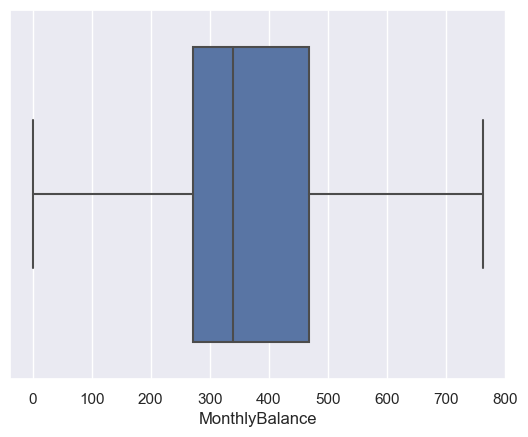

In [22]:
for i in data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [23]:
data

,Month,Occupation,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,Scientist,3.0,11.27,809.98,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,Scientist,-1.0,11.27,809.98,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,Scientist,3.0,8.22,809.98,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,Scientist,5.0,6.27,809.98,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,Scientist,6.0,11.27,809.98,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,20.0,9.50,502.38,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,Mechanic,23.0,11.50,502.38,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,Mechanic,18.0,11.50,502.38,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,Mechanic,27.0,11.50,502.38,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [24]:
data=data[['Month','Occupation','Delayfromduedate','ChangedCreditLimit','OutstandingDebt','PaymentofMinAmount','Amountinvestedmonthly','PaymentBehaviour','MonthlyBalance','score']]
data


,Month,Occupation,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score
0,January,Scientist,3.0,11.27,809.98,No,80.415295,HighspentSmallvaluepayments,312.494089,0
1,February,Scientist,-1.0,11.27,809.98,No,118.280222,LowspentLargevaluepayments,284.629163,0
2,March,Scientist,3.0,8.22,809.98,No,81.699521,LowspentMediumvaluepayments,331.209863,0
3,April,Scientist,5.0,6.27,809.98,No,199.458074,LowspentSmallvaluepayments,223.451310,0
4,May,Scientist,6.0,11.27,809.98,No,41.420153,HighspentMediumvaluepayments,341.489231,0
...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,20.0,9.50,502.38,No,140.581403,HighspentMediumvaluepayments,410.256158,1
87491,April,Mechanic,23.0,11.50,502.38,No,60.971333,HighspentLargevaluepayments,479.866228,1
87492,May,Mechanic,18.0,11.50,502.38,No,54.185950,HighspentMediumvaluepayments,496.651610,1
87493,June,Mechanic,27.0,11.50,502.38,No,24.028477,HighspentLargevaluepayments,516.809083,1


In [25]:
grouped=data.groupby(['Month','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['month_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['Month','month_woe']],how='left',on='Month')
data.drop('Month',axis=1,inplace=True)
data

,Occupation,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score,month_woe
0,Scientist,3.0,11.27,809.98,No,80.415295,HighspentSmallvaluepayments,312.494089,0,0.013036
1,Scientist,-1.0,11.27,809.98,No,118.280222,LowspentLargevaluepayments,284.629163,0,0.031453
2,Scientist,3.0,8.22,809.98,No,81.699521,LowspentMediumvaluepayments,331.209863,0,0.021323
3,Scientist,5.0,6.27,809.98,No,199.458074,LowspentSmallvaluepayments,223.451310,0,-0.017560
4,Scientist,6.0,11.27,809.98,No,41.420153,HighspentMediumvaluepayments,341.489231,0,-0.019930
...,...,...,...,...,...,...,...,...,...,...
87490,Mechanic,20.0,9.50,502.38,No,140.581403,HighspentMediumvaluepayments,410.256158,1,0.021323
87491,Mechanic,23.0,11.50,502.38,No,60.971333,HighspentLargevaluepayments,479.866228,1,-0.017560
87492,Mechanic,18.0,11.50,502.38,No,54.185950,HighspentMediumvaluepayments,496.651610,1,-0.019930
87493,Mechanic,27.0,11.50,502.38,No,24.028477,HighspentLargevaluepayments,516.809083,1,-0.030392


In [26]:
grouped=data.groupby(['Occupation','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['occupation_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['Occupation','occupation_woe']],how='left',on='Occupation')
data.drop('Occupation',axis=1,inplace=True)
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score,month_woe,occupation_woe
0,3.0,11.27,809.98,No,80.415295,HighspentSmallvaluepayments,312.494089,0,0.013036,-0.080783
1,-1.0,11.27,809.98,No,118.280222,LowspentLargevaluepayments,284.629163,0,0.031453,-0.080783
2,3.0,8.22,809.98,No,81.699521,LowspentMediumvaluepayments,331.209863,0,0.021323,-0.080783
3,5.0,6.27,809.98,No,199.458074,LowspentSmallvaluepayments,223.451310,0,-0.017560,-0.080783
4,6.0,11.27,809.98,No,41.420153,HighspentMediumvaluepayments,341.489231,0,-0.019930,-0.080783
...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.50,502.38,No,140.581403,HighspentMediumvaluepayments,410.256158,1,0.021323,-0.053353
87491,23.0,11.50,502.38,No,60.971333,HighspentLargevaluepayments,479.866228,1,-0.017560,-0.053353
87492,18.0,11.50,502.38,No,54.185950,HighspentMediumvaluepayments,496.651610,1,-0.019930,-0.053353
87493,27.0,11.50,502.38,No,24.028477,HighspentLargevaluepayments,516.809083,1,-0.030392,-0.053353


In [27]:
grouped=data.groupby(['PaymentofMinAmount','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['payment_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['PaymentofMinAmount','payment_woe']],how='left',on='PaymentofMinAmount')
data.drop('PaymentofMinAmount',axis=1,inplace=True)
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score,month_woe,occupation_woe,payment_woe
0,3.0,11.27,809.98,80.415295,HighspentSmallvaluepayments,312.494089,0,0.013036,-0.080783,0.97376
1,-1.0,11.27,809.98,118.280222,LowspentLargevaluepayments,284.629163,0,0.031453,-0.080783,0.97376
2,3.0,8.22,809.98,81.699521,LowspentMediumvaluepayments,331.209863,0,0.021323,-0.080783,0.97376
3,5.0,6.27,809.98,199.458074,LowspentSmallvaluepayments,223.451310,0,-0.017560,-0.080783,0.97376
4,6.0,11.27,809.98,41.420153,HighspentMediumvaluepayments,341.489231,0,-0.019930,-0.080783,0.97376
...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.50,502.38,140.581403,HighspentMediumvaluepayments,410.256158,1,0.021323,-0.053353,0.97376
87491,23.0,11.50,502.38,60.971333,HighspentLargevaluepayments,479.866228,1,-0.017560,-0.053353,0.97376
87492,18.0,11.50,502.38,54.185950,HighspentMediumvaluepayments,496.651610,1,-0.019930,-0.053353,0.97376
87493,27.0,11.50,502.38,24.028477,HighspentLargevaluepayments,516.809083,1,-0.030392,-0.053353,0.97376


In [28]:
grouped=data.groupby(['PaymentBehaviour','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['behavior_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['PaymentBehaviour','behavior_woe']],how='left',on='PaymentBehaviour')
data.drop('PaymentBehaviour',axis=1,inplace=True)
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,score,month_woe,occupation_woe,payment_woe,behavior_woe
0,3.0,11.27,809.98,80.415295,312.494089,0,0.013036,-0.080783,0.97376,0.087011
1,-1.0,11.27,809.98,118.280222,284.629163,0,0.031453,-0.080783,0.97376,0.057730
2,3.0,8.22,809.98,81.699521,331.209863,0,0.021323,-0.080783,0.97376,-0.070569
3,5.0,6.27,809.98,199.458074,223.451310,0,-0.017560,-0.080783,0.97376,-0.315796
4,6.0,11.27,809.98,41.420153,341.489231,0,-0.019930,-0.080783,0.97376,0.182672
...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.50,502.38,140.581403,410.256158,1,0.021323,-0.053353,0.97376,0.182672
87491,23.0,11.50,502.38,60.971333,479.866228,1,-0.017560,-0.053353,0.97376,0.391003
87492,18.0,11.50,502.38,54.185950,496.651610,1,-0.019930,-0.053353,0.97376,0.182672
87493,27.0,11.50,502.38,24.028477,516.809083,1,-0.030392,-0.053353,0.97376,0.391003


In [29]:
ranges=[-np.inf,data.Delayfromduedate.quantile(0.25),data.Delayfromduedate.quantile(0.5),data.Delayfromduedate.quantile(0.75),np.inf]
data['category']=pd.cut(data['Delayfromduedate'],bins=ranges)
grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['delay_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['category','delay_woe']],how='left',on='category')
data.drop('Delayfromduedate',axis=1,inplace=True)
data.drop('category',axis=1,inplace=True)
data

,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,score,month_woe,occupation_woe,payment_woe,behavior_woe,delay_woe
0,11.27,809.98,80.415295,312.494089,0,0.013036,-0.080783,0.97376,0.087011,1.050763
1,11.27,809.98,118.280222,284.629163,0,0.031453,-0.080783,0.97376,0.057730,1.050763
2,8.22,809.98,81.699521,331.209863,0,0.021323,-0.080783,0.97376,-0.070569,1.050763
3,6.27,809.98,199.458074,223.451310,0,-0.017560,-0.080783,0.97376,-0.315796,1.050763
4,11.27,809.98,41.420153,341.489231,0,-0.019930,-0.080783,0.97376,0.182672,1.050763
...,...,...,...,...,...,...,...,...,...,...
87490,9.50,502.38,140.581403,410.256158,1,0.021323,-0.053353,0.97376,0.182672,-0.100916
87491,11.50,502.38,60.971333,479.866228,1,-0.017560,-0.053353,0.97376,0.391003,-0.100916
87492,11.50,502.38,54.185950,496.651610,1,-0.019930,-0.053353,0.97376,0.182672,0.496847
87493,11.50,502.38,24.028477,516.809083,1,-0.030392,-0.053353,0.97376,0.391003,-0.100916


In [30]:
ranges=[-np.inf,data.ChangedCreditLimit.quantile(0.25),data.ChangedCreditLimit.quantile(0.5),data.ChangedCreditLimit.quantile(0.75),np.inf]
data['category']=pd.cut(data['ChangedCreditLimit'],bins=ranges)
grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['changed_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['category','changed_woe']],how='left',on='category')
data.drop('ChangedCreditLimit',axis=1,inplace=True)
data.drop('category',axis=1,inplace=True)
data

,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,score,month_woe,occupation_woe,payment_woe,behavior_woe,delay_woe,changed_woe
0,809.98,80.415295,312.494089,0,0.013036,-0.080783,0.97376,0.087011,1.050763,0.131674
1,809.98,118.280222,284.629163,0,0.031453,-0.080783,0.97376,0.057730,1.050763,0.131674
2,809.98,81.699521,331.209863,0,0.021323,-0.080783,0.97376,-0.070569,1.050763,0.039799
3,809.98,199.458074,223.451310,0,-0.017560,-0.080783,0.97376,-0.315796,1.050763,0.039799
4,809.98,41.420153,341.489231,0,-0.019930,-0.080783,0.97376,0.182672,1.050763,0.131674
...,...,...,...,...,...,...,...,...,...,...
87490,502.38,140.581403,410.256158,1,0.021323,-0.053353,0.97376,0.182672,-0.100916,0.131674
87491,502.38,60.971333,479.866228,1,-0.017560,-0.053353,0.97376,0.391003,-0.100916,0.131674
87492,502.38,54.185950,496.651610,1,-0.019930,-0.053353,0.97376,0.182672,0.496847,0.131674
87493,502.38,24.028477,516.809083,1,-0.030392,-0.053353,0.97376,0.391003,-0.100916,0.131674


In [31]:
ranges=[-np.inf,data.OutstandingDebt.quantile(0.25),data.OutstandingDebt.quantile(0.5),data.OutstandingDebt.quantile(0.75),np.inf]
data['category']=pd.cut(data['OutstandingDebt'],bins=ranges)
grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['out_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['category','out_woe']],how='left',on='category')
data.drop('OutstandingDebt',axis=1,inplace=True)
data.drop('category',axis=1,inplace=True)
data

,Amountinvestedmonthly,MonthlyBalance,score,month_woe,occupation_woe,payment_woe,behavior_woe,delay_woe,changed_woe,out_woe
0,80.415295,312.494089,0,0.013036,-0.080783,0.97376,0.087011,1.050763,0.131674,1.209568
1,118.280222,284.629163,0,0.031453,-0.080783,0.97376,0.057730,1.050763,0.131674,1.209568
2,81.699521,331.209863,0,0.021323,-0.080783,0.97376,-0.070569,1.050763,0.039799,1.209568
3,199.458074,223.451310,0,-0.017560,-0.080783,0.97376,-0.315796,1.050763,0.039799,1.209568
4,41.420153,341.489231,0,-0.019930,-0.080783,0.97376,0.182672,1.050763,0.131674,1.209568
...,...,...,...,...,...,...,...,...,...,...
87490,140.581403,410.256158,1,0.021323,-0.053353,0.97376,0.182672,-0.100916,0.131674,1.271917
87491,60.971333,479.866228,1,-0.017560,-0.053353,0.97376,0.391003,-0.100916,0.131674,1.271917
87492,54.185950,496.651610,1,-0.019930,-0.053353,0.97376,0.182672,0.496847,0.131674,1.271917
87493,24.028477,516.809083,1,-0.030392,-0.053353,0.97376,0.391003,-0.100916,0.131674,1.271917


In [32]:
ranges=[-np.inf,data.Amountinvestedmonthly.quantile(0.25),data.Amountinvestedmonthly.quantile(0.5),data.Amountinvestedmonthly.quantile(0.75),np.inf]
data['category']=pd.cut(data['Amountinvestedmonthly'],bins=ranges)
grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['amount_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['category','amount_woe']],how='left',on='category')
data.drop('Amountinvestedmonthly',axis=1,inplace=True)
data.drop('category',axis=1,inplace=True)
data

,MonthlyBalance,score,month_woe,occupation_woe,payment_woe,behavior_woe,delay_woe,changed_woe,out_woe,amount_woe
0,312.494089,0,0.013036,-0.080783,0.97376,0.087011,1.050763,0.131674,1.209568,-0.151797
1,284.629163,0,0.031453,-0.080783,0.97376,0.057730,1.050763,0.131674,1.209568,-0.009250
2,331.209863,0,0.021323,-0.080783,0.97376,-0.070569,1.050763,0.039799,1.209568,-0.151797
3,223.451310,0,-0.017560,-0.080783,0.97376,-0.315796,1.050763,0.039799,1.209568,-0.009250
4,341.489231,0,-0.019930,-0.080783,0.97376,0.182672,1.050763,0.131674,1.209568,-0.150121
...,...,...,...,...,...,...,...,...,...,...
87490,410.256158,1,0.021323,-0.053353,0.97376,0.182672,-0.100916,0.131674,1.271917,-0.009250
87491,479.866228,1,-0.017560,-0.053353,0.97376,0.391003,-0.100916,0.131674,1.271917,-0.151797
87492,496.651610,1,-0.019930,-0.053353,0.97376,0.182672,0.496847,0.131674,1.271917,-0.150121
87493,516.809083,1,-0.030392,-0.053353,0.97376,0.391003,-0.100916,0.131674,1.271917,-0.150121


In [33]:
ranges=[-np.inf,data.MonthlyBalance.quantile(0.25),data.MonthlyBalance.quantile(0.5),data.MonthlyBalance.quantile(0.75),np.inf]
data['category']=pd.cut(data['MonthlyBalance'],bins=ranges)
grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['balance_woe']=np.log(grouped['positive']/grouped['negative'])
data=data.merge(grouped[['category','balance_woe']],how='left',on='category')
data.drop('MonthlyBalance',axis=1,inplace=True)
data.drop('category',axis=1,inplace=True)
data

,score,month_woe,occupation_woe,payment_woe,behavior_woe,delay_woe,changed_woe,out_woe,amount_woe,balance_woe
0,0,0.013036,-0.080783,0.97376,0.087011,1.050763,0.131674,1.209568,-0.151797,-0.237030
1,0,0.031453,-0.080783,0.97376,0.057730,1.050763,0.131674,1.209568,-0.009250,-0.237030
2,0,0.021323,-0.080783,0.97376,-0.070569,1.050763,0.039799,1.209568,-0.151797,-0.237030
3,0,-0.017560,-0.080783,0.97376,-0.315796,1.050763,0.039799,1.209568,-0.009250,-0.489969
4,0,-0.019930,-0.080783,0.97376,0.182672,1.050763,0.131674,1.209568,-0.150121,0.214456
...,...,...,...,...,...,...,...,...,...,...
87490,1,0.021323,-0.053353,0.97376,0.182672,-0.100916,0.131674,1.271917,-0.009250,0.214456
87491,1,-0.017560,-0.053353,0.97376,0.391003,-0.100916,0.131674,1.271917,-0.151797,0.683625
87492,1,-0.019930,-0.053353,0.97376,0.182672,0.496847,0.131674,1.271917,-0.150121,0.683625
87493,1,-0.030392,-0.053353,0.97376,0.391003,-0.100916,0.131674,1.271917,-0.150121,0.683625


In [34]:
y=data['score']
x=data[['month_woe','occupation_woe','payment_woe','behavior_woe','delay_woe','changed_woe','out_woe','amount_woe','balance_woe']]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
def evaluate(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_prob=model.predict_proba(x_test)[:,1]
    roc_pred=metrics.roc_auc_score(y_test,y_pred)
    roc_prob=metrics.roc_auc_score(y_test,y_prob)
    gini_pred=2*roc_pred-1
    gini_prob=2*roc_prob-1
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    report=metrics.classification_report(y_test,y_pred)
    print(gini_pred*100)
    print(gini_prob*100)
    print(confusion_matrix)
    print(report)
    return gini_pred
    return gini_prob

In [37]:
logreg=LogisticRegression()

In [38]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [39]:
result=evaluate(logreg,x_test,y_test)

38.7708169278461
57.95192639593743
[[16181  2415]
 [ 3692  3961]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     18596
           1       0.62      0.52      0.56      7653

    accuracy                           0.77     26249
   macro avg       0.72      0.69      0.70     26249
weighted avg       0.76      0.77      0.76     26249



In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

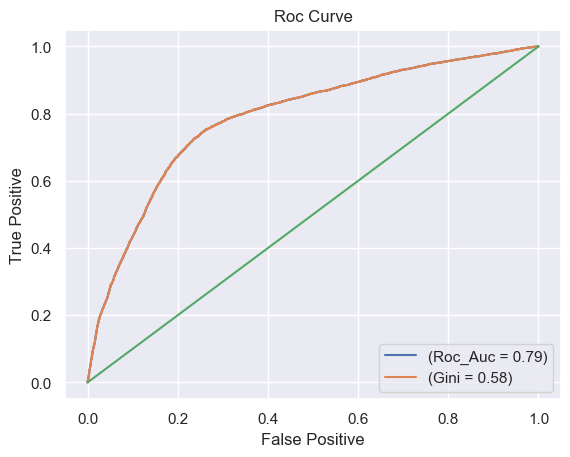

In [41]:
y_prob=logreg.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob)
gini=2*(roc_auc_score(y_test,y_prob))-1
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.figure()
plt.plot(fpr,tpr,label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr,tpr,label='(Gini = %0.2f)' % gini)
plt.plot([0, 1],[0, 1])
plt.xlim()
plt.ylim()
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
df=pd.read_excel(r'test_data.xlsx')
df

,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,CUS0x7c21,-1.094846,0.039621,-1.223150,0.015442,-0.489969,0.034597,-0.001817,-0.472545,-0.315796
1,CUS0xbaf4,-0.100916,-0.248829,1.209568,-0.124014,0.683625,0.116226,0.004571,-0.472545,0.182672
2,CUS0xd51,1.050763,0.095608,-0.352109,-0.124014,0.214456,0.033493,-0.017560,0.973760,0.182672
3,CUS0x5d82,0.496847,0.095608,1.209568,0.015442,-0.237030,-0.080783,-0.001817,0.973760,0.087011
4,CUS0x5c28,-0.100916,-0.248829,1.209568,0.015442,-0.237030,0.033493,0.021323,-0.472545,-0.315796
...,...,...,...,...,...,...,...,...,...,...
195,CUS0x9885,1.050763,0.095608,-0.352109,0.015442,0.683625,-0.080783,-0.019930,-0.010961,0.391003
196,CUS0xb78e,-0.100916,0.039621,1.209568,-0.124014,0.214456,-0.080783,-0.030392,-0.472545,-0.003414
197,CUS0xc620,-1.094846,0.131787,-0.352109,0.015442,-0.489969,0.087417,-0.017560,-0.472545,0.057730
198,CUS0xbaa9,0.496847,0.131787,1.271917,0.347071,0.683625,-0.059749,0.013036,-0.472545,0.391003


In [43]:
df.iloc[:,1:]

,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,-1.094846,0.039621,-1.223150,0.015442,-0.489969,0.034597,-0.001817,-0.472545,-0.315796
1,-0.100916,-0.248829,1.209568,-0.124014,0.683625,0.116226,0.004571,-0.472545,0.182672
2,1.050763,0.095608,-0.352109,-0.124014,0.214456,0.033493,-0.017560,0.973760,0.182672
3,0.496847,0.095608,1.209568,0.015442,-0.237030,-0.080783,-0.001817,0.973760,0.087011
4,-0.100916,-0.248829,1.209568,0.015442,-0.237030,0.033493,0.021323,-0.472545,-0.315796
...,...,...,...,...,...,...,...,...,...
195,1.050763,0.095608,-0.352109,0.015442,0.683625,-0.080783,-0.019930,-0.010961,0.391003
196,-0.100916,0.039621,1.209568,-0.124014,0.214456,-0.080783,-0.030392,-0.472545,-0.003414
197,-1.094846,0.131787,-0.352109,0.015442,-0.489969,0.087417,-0.017560,-0.472545,0.057730
198,0.496847,0.131787,1.271917,0.347071,0.683625,-0.059749,0.013036,-0.472545,0.391003


In [44]:
df=df.rename(columns={'Month_woe':'month_woe','Occupation_woe':'occupation_woe','PaymentofMinAmount_woe':'payment_woe','PaymentBehaviour_woe':'behavior_woe','Delayfromduedate_woe':'delay_woe','ChangedCreditLimit_woe':'changed_woe','OutstandingDebt_woe':'out_woe','Amountinvestedmonthly_woe':'amount_woe','MonthlyBalance_woe':'balance_woe'})
df

,CustomerID,delay_woe,changed_woe,out_woe,amount_woe,balance_woe,occupation_woe,month_woe,payment_woe,behavior_woe
0,CUS0x7c21,-1.094846,0.039621,-1.223150,0.015442,-0.489969,0.034597,-0.001817,-0.472545,-0.315796
1,CUS0xbaf4,-0.100916,-0.248829,1.209568,-0.124014,0.683625,0.116226,0.004571,-0.472545,0.182672
2,CUS0xd51,1.050763,0.095608,-0.352109,-0.124014,0.214456,0.033493,-0.017560,0.973760,0.182672
3,CUS0x5d82,0.496847,0.095608,1.209568,0.015442,-0.237030,-0.080783,-0.001817,0.973760,0.087011
4,CUS0x5c28,-0.100916,-0.248829,1.209568,0.015442,-0.237030,0.033493,0.021323,-0.472545,-0.315796
...,...,...,...,...,...,...,...,...,...,...
195,CUS0x9885,1.050763,0.095608,-0.352109,0.015442,0.683625,-0.080783,-0.019930,-0.010961,0.391003
196,CUS0xb78e,-0.100916,0.039621,1.209568,-0.124014,0.214456,-0.080783,-0.030392,-0.472545,-0.003414
197,CUS0xc620,-1.094846,0.131787,-0.352109,0.015442,-0.489969,0.087417,-0.017560,-0.472545,0.057730
198,CUS0xbaa9,0.496847,0.131787,1.271917,0.347071,0.683625,-0.059749,0.013036,-0.472545,0.391003


In [45]:
x_train.columns

Index(['month_woe', 'occupation_woe', 'payment_woe', 'behavior_woe',
       'delay_woe', 'changed_woe', 'out_woe', 'amount_woe', 'balance_woe'],
      dtype='object')

In [46]:
df.columns

Index(['CustomerID', 'delay_woe', 'changed_woe', 'out_woe', 'amount_woe',
       'balance_woe', 'occupation_woe', 'month_woe', 'payment_woe',
       'behavior_woe'],
      dtype='object')

In [47]:
df = df[['CustomerID','month_woe', 'occupation_woe', 'payment_woe', 'behavior_woe',
       'delay_woe', 'changed_woe', 'out_woe', 'amount_woe', 'balance_woe']]

In [48]:
prob=logreg.predict_proba(df.iloc[:,1:])[:,1]

prob

array([0.74707584, 0.08009305, 0.22516962, 0.10097112, 0.11011891,
       0.50669526, 0.51400901, 0.2784135 , 0.59669992, 0.13265161,
       0.16747549, 0.4309524 , 0.17642286, 0.09173505, 0.54611491,
       0.37657488, 0.15095104, 0.29916863, 0.09276847, 0.58064111,
       0.54384556, 0.33495849, 0.06763127, 0.18449158, 0.63201735,
       0.05717435, 0.05434186, 0.55793786, 0.57784515, 0.10641337,
       0.60975389, 0.57356447, 0.32318802, 0.72151543, 0.33292986,
       0.06668767, 0.35134643, 0.580654  , 0.5864481 , 0.07466832,
       0.26414782, 0.52376273, 0.25777199, 0.22607813, 0.18388072,
       0.10969048, 0.78389028, 0.08296974, 0.49943579, 0.56040358,
       0.14145965, 0.1007676 , 0.63361194, 0.38779414, 0.42842744,
       0.27919561, 0.08495251, 0.1106624 , 0.09533743, 0.24404522,
       0.11992493, 0.60360186, 0.41424114, 0.32502351, 0.10388956,
       0.07320505, 0.08492554, 0.08838804, 0.08183639, 0.19099202,
       0.15359118, 0.08690348, 0.60132517, 0.25847332, 0.07005

In [49]:
df['PD']=prob

/var/folders/24/xbz6dnq175scj5x7mtzkq64h0000gn/T/ipykernel_17971/51016837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PD']=prob


In [50]:
df

,CustomerID,month_woe,occupation_woe,payment_woe,behavior_woe,delay_woe,changed_woe,out_woe,amount_woe,balance_woe,PD
0,CUS0x7c21,-0.001817,0.034597,-0.472545,-0.315796,-1.094846,0.039621,-1.223150,0.015442,-0.489969,0.747076
1,CUS0xbaf4,0.004571,0.116226,-0.472545,0.182672,-0.100916,-0.248829,1.209568,-0.124014,0.683625,0.080093
2,CUS0xd51,-0.017560,0.033493,0.973760,0.182672,1.050763,0.095608,-0.352109,-0.124014,0.214456,0.225170
3,CUS0x5d82,-0.001817,-0.080783,0.973760,0.087011,0.496847,0.095608,1.209568,0.015442,-0.237030,0.100971
4,CUS0x5c28,0.021323,0.033493,-0.472545,-0.315796,-0.100916,-0.248829,1.209568,0.015442,-0.237030,0.110119
...,...,...,...,...,...,...,...,...,...,...,...
195,CUS0x9885,-0.019930,-0.080783,-0.010961,0.391003,1.050763,0.095608,-0.352109,0.015442,0.683625,0.244550
196,CUS0xb78e,-0.030392,-0.080783,-0.472545,-0.003414,-0.100916,0.039621,1.209568,-0.124014,0.214456,0.180141
197,CUS0xc620,-0.017560,0.087417,-0.472545,0.057730,-1.094846,0.131787,-0.352109,0.015442,-0.489969,0.557739
198,CUS0xbaa9,0.013036,-0.059749,-0.472545,0.391003,0.496847,0.131787,1.271917,0.347071,0.683625,0.098685
